# Funções

In [22]:
import time
#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimita os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """
    import geopy                             # Biblioteca para geocodificação
    from geopy import distance               # Função para calculo de distância
    
    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, ls='-', lw=1.)

# Processamento

In [23]:
import pandas as pd
df = pd.read_excel('03out_Granizo.xlsx')
#df.dropna(subset=['lat','lon'], inplace=True)
df.head(2)

,Mês,Dia,\nhh(UTC),mm,Unnamed: 4,INCER-\nTEZA NO\nHORÁRIO\nMINUTOS,lat,lon,INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km),Município,ES\nTA\nDO,TIPO: \nGRA\nVEN\nOU\nTOR,INTEN-\nSIDADE\n(cm OU\n km/h),DESCRIÇÃO
0,10.0,3.0,15.0,30.0,930,20.0,-21.0800,-47.0497,2.0,Itamogi,MG,GRA,3,horário estimado por satélite. https://www.you...
1,10.0,3.0,15.0,40.0,940,30.0,-21.0178,-46.5207,8.0,Bom Jesus da Penha,MG,GRA,0,Horário estimado por satélite. Pomares de Abac...


CPU times: total: 5.19 s
Wall time: 5.26 s


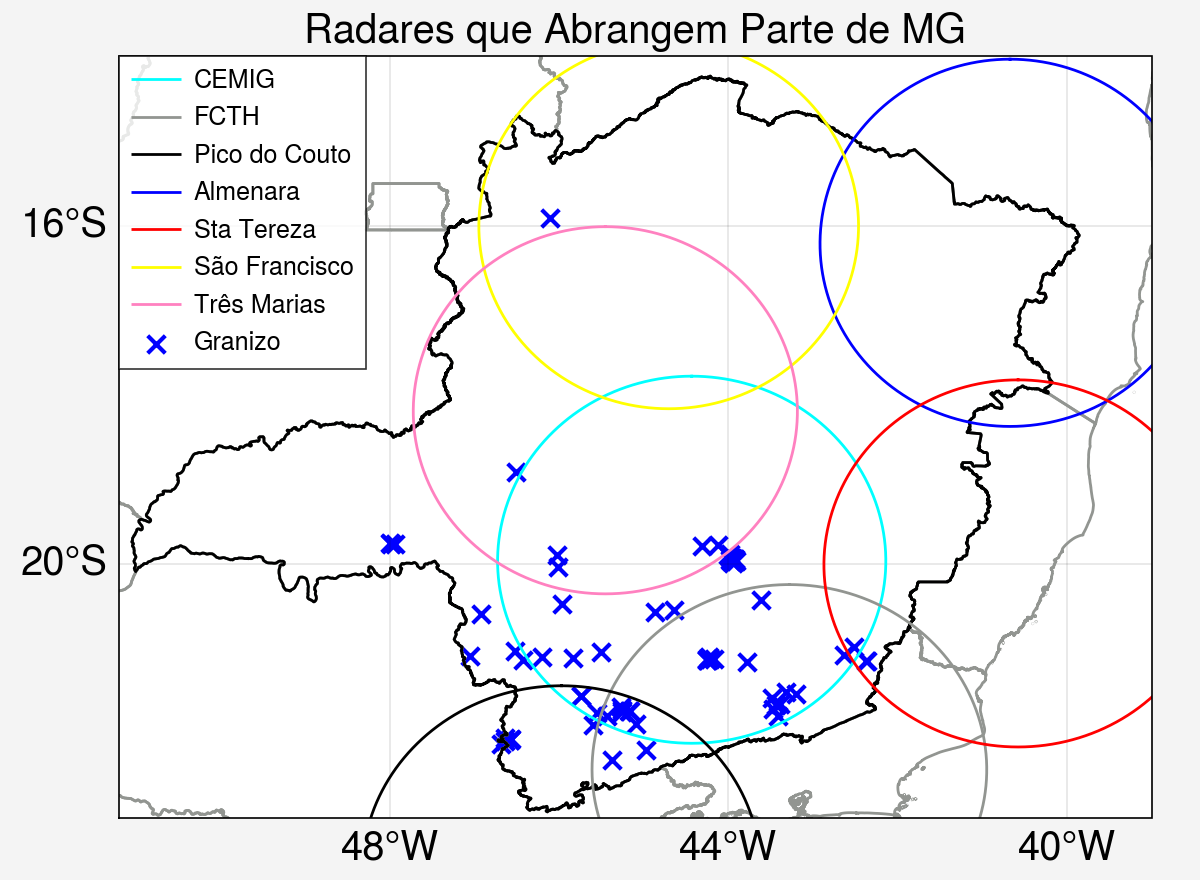

In [31]:
%%time
#==========================================================================#
#                         IMPORTAÇÃO DE BIBLIOTECAS
#==========================================================================#
import xarray as xr
import proplot as pplt
import cartopy.crs as ccrs
import time
import numpy as np
import salem
import cartopy.io.shapereader as shpreader
import warnings
warnings.filterwarnings("ignore")

#==========================================================================#
#                         LEITURA DOS DADOS
#==========================================================================#
# limites da figura
latmin, latmax, lonmin, lonmax = -23, -14, -50, -40
latmin, latmax, lonmin, lonmax = -23, -14, -51.2, -39

# leitura do dado
#ds = xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land').sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#==========================================================================#
#                           PLOTA FIGURA
#==========================================================================#
# moldura da figura
fig, ax = pplt.subplots(figsize=(6.,4.4), tight=True, proj='pcarree')

# mapa de contornos preenchidos
"""
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'],
                   cmap='terrain',
                   levels=pplt.arange(0, 3000, 10))
"""

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='Radares que Abrangem Parte de MG',
          small='20px', large='20px')

# contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1.0)

# contorno de MG
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/UFs/MG/MG_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# localização dos radares
lon_radar_cemig, lat_radar_cemig = -44.4344, -19.9452
lon_radar_picocouto, lat_radar_picocouto = -43.2806, -22.4060
lon_radar_fcth, lat_radar_fcth = -45.97279, -23.600795
lon_radar_almenara, lat_radar_almenara = -40.67425, -16.20203
lon_radar_statereza, lat_radar_statereza = -40.5794, -19.98887
lon_radar_saofrancisco, lat_radar_saofrancisco = -44.7061, -15.9930
lon_radar_tresmarias, lat_radar_tresmarias = -45.4546, -18.1798
lon_radar_salvador, lat_radar_salvador = -38.3313, -12.8761

# anel do radar
evm_plota_aneis_em_geral([240], lon_radar_cemig, lat_radar_cemig, 'cyan', label='CEMIG')
evm_plota_aneis_em_geral([240], lon_radar_picocouto, lat_radar_picocouto, 'gray', label='FCTH')
evm_plota_aneis_em_geral([240], lon_radar_fcth, lat_radar_fcth, 'black', label='Pico do Couto')
evm_plota_aneis_em_geral([240], lon_radar_almenara, lat_radar_almenara, 'blue', label='Almenara')
evm_plota_aneis_em_geral([240], lon_radar_statereza, lat_radar_statereza, 'red', label='Sta Tereza')
evm_plota_aneis_em_geral([240], lon_radar_saofrancisco, lat_radar_saofrancisco, 'yellow', label='São Francisco')
evm_plota_aneis_em_geral([240], lon_radar_tresmarias, lat_radar_tresmarias, 'pink', label='Três Marias')
#evm_plota_aneis_em_geral([240], lon_radar_salvador, lat_radar_salvador , 'green', label='Salvador')

# Plota granizo
ax.scatter(df['lon'].values, df['lat'].values, 
           transform=ccrs.PlateCarree(), 
           marker='x', s=40, color='b', 
           label='Granizo')

# adiciona legenda
ax.legend(loc='ul', ncols=1, frameon=True, prop={'size': 9})

# barra de cores
#fig.colorbar(map1, loc='r', label='Elevação (m)', ticks=600, ticklabelsize=13, labelsize=13, space=-1.3)

# salva figuras
fig.save('localizacao_radares.png', dpi=300)